# Classification - In or Out?
by [HydraulicSheep](https://github.com/HydraulicSheep)

#### References: 
 http://cs229.stanford.edu/notes2020spring/cs229-notes1.pdf **[1]**
 
 https://archive.ics.uci.edu/ml/datasets/Wine+Quality **[2]**

In nature, a very intuitive concept is that of groups. Objects with similar characteristics can be lumped together, despite slight differences, to reveal meaningful relationships and rules.

In statistics, classification is simply the problem of assigning datapoints to groups. For example, classifying over the famous [MNIST Digit Dataset](http://yann.lecun.com/exdb/mnist/) can identify handwritten digits.

## A Simple Linear Classifier

The data we'll be looking at for this task is a collection of characteristics for a [variety of wines](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) **[2]**. Some of them are red and others are white. The goal is to best classify the red and white wines so that, theoretically, we can successfully predict these types. The specific machine learning technique we'll use for this is called '**Logistic Regression**'.

In [1]:
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
whiteWines = pandas.read_csv('winequality-white.csv',sep=';')

In [3]:
whiteWines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
redWines = pandas.read_csv('winequality-red.csv',sep=';')

In [5]:
redWines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Great! Our data is imported and contains a number of (hopefully) useful factors for classifying wines. However, reading the dataset information, the quality is an 'output variable'. As we aren't training to assess the wine's quality, lte's just remove that from our data.

In [6]:
redWines = redWines.drop(columns=['quality'])
redWines.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
whiteWines = whiteWines.drop(columns=['quality'])
whiteWines.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


Now that everything's established, let's start writing some tools for our classification.

### Logistic Regression

Following from Linear Regression, Logistic Regression is a very natural system.
We need to find a function that best maps any point in the training data to the correct class - white wine or red wine.

Let's define one class as having the y-value '1' and the other as having y-value '0'.

So, for the function to produce valid outputs, we need a function that maps all possible X values to a y-value between 0 and 1.


There are a few functions that do this, but one of them is the logistic/sigmoid curve:

$$ f(x) = \frac{1}{1+e^{-x}}$$

Now, for a linear classifier, we assume that the class is given by a linear combination of a data-point's features. i.e. a weighted sum $= \theta_{0} + \theta_{1}x_1 + \theta_{2}x_2 + ... + \theta_{m}x_m $

Expressing this in matrix form, with matrices $ \theta $ and X, we get: $$ s(x) =  \theta^{T}X $$

And to confine this between 0 and 1, we take f(s(x)) $$ h(x) = \frac{1}{1+e^{\theta^{T}X}}$$ 
where h(x) is called our 'hypothesis function'.

Let's define this as a function of theta and X:


In [8]:
# Takes a matrix of weights, theta, and training points, x
def h(theta, x):
    theta_tr = theta.transpose()
    prod = np.matmul(theta,x)
    return 1/(1+math.exp(-prod))

Let's test this on some data:

In [9]:
theta = np.array([1,2,3,4])
x = np.array([1,-2,3,-4])

In [10]:
h(theta,x)

4.5397868702434395e-05

Now, from our classifier definitions, we know the following probabilities [1]:
$$ Pr(y = 1 |x;\theta ) = h(x) $$
$$ Pr(y = 0 |x;\theta ) = 1- h(x) $$

And, from these, we can describe the likelihood $ L(\theta) $ of the parameters, describing the probability that this training outcome was observed if the true parameter values are as given. The log likelihood is given by $ l(\theta)  = log(L(\theta)) $.

To find the optimal set of parameters, we seek $\theta$ that maximises $L(\theta)$. Clearly, this will also maximise $l(\theta)$

Now, by some algebra [1], for logistic regression, the log likelihood function is given by:
$$ l(\theta)=\sum_{i=1}^{n}y^{(i)}log\, h(x^{(i)})\, +\, (1-y^{(i)})log(1-h(x^{(i)}))  $$
Let's implement this as a function:

In [11]:
def log_likelihood(theta, X, Y):
    total = 0
    for i in range(X.shape[0]):
        total+=Y[i]*np.log(h(theta,np.array(X[i])))+(1-Y[i])*np.log(1-h(theta,np.array(X[i])))
    return total

And, let's test a dataset:

In [12]:
theta = np.array([1,3])
X = np.array([[1,4],[2,5],[6,8]])
Y = np.array([1,0,0,1])
log_likelihood(theta,X,Y)

-47.001022854253044

Great! Now we just need a process to **maximise the log likelihood** function. One such method is gradient ascent. 

This involves increasing each value of theta such that the cost function will locally increase the most - i.e. changing each $ \theta_j $ in the **direction of the log-likelihood's partial derivative with respect to $ \theta_j $**

And, per some calculus [1], this partial derivative for any $ \theta_j $ is given by: $$ \frac{\partial l(\theta)}{\partial \theta_j} = (y-h(x))x_j$$

Now, we want to change theta by some 'rate' proportional to this partial derivative. The constant of proportionality is called the 'learning rate'.

Let's define this:

In [13]:
def step(theta,rate,x,y):
    theta = theta + rate*(y-h(theta,x))*x
    return theta

Great! Now we can get to training and testing

### Training and Testing

Training is simply the process of running a number of iterations of this step process. To show how this works for a small set of parameters, let's generate two classes of data randomly

In [14]:
import random

# Let's try training on some placeholder data
theta = np.array([1,1,1])
red = []
blue = []

# Let's generate some points

# Red has class 1
# Blue has class 0
# Let's distribute red points around 20
# Let's distribute blue points around 0

for i in range(100):
    x = np.random.normal(20,2) # Sampling from Gaussian distribution around 20
    y = np.random.normal(20,2)
    red.append([1,x,y])
  
red = np.array(red)

for i in range(100):
    x = np.random.normal(0,2) # Sampling from Gaussian distribution around 0
    y = np.random.normal(0,2)
    blue.append([1,x,y])
    
blue = np.array(blue)

rate = 0.1
print(theta)
STEPS = 10000
for i in range(STEPS):
    for j in range(X.shape[0]):      
        theta = step(theta,rate,red[j],1)
        theta = step(theta,rate,blue[j],0)
print(theta)


[1 1 1]
[-7.91779223  1.21474517  0.44424733]


Great! Now we have a trained model. Let's take a look at our decision boundary.
The decision boundary give points with a hypothesis value of 0.5 - they fall between two classes. So solve: $$ h(x) = \frac{1}{1+e^{\theta^{T}X}} = \frac{1}{2} $$ $$ 2 = 1 + e^{\theta^{T}X} $$ $$ e^{\theta^{T}X} = 1 $$ $$ \theta^{T}X = 0 $$

So we solve for when the weighted sum is zero and (for y = $ x_2 $) we get: $$ \theta_2y + \theta_1x_1 + \theta_0 = 0 $$ $$ y = -\frac{\theta_1}{\theta_2}x_1 -\frac{\theta_0}{\theta_2} $$

If we plot this, we get the following:

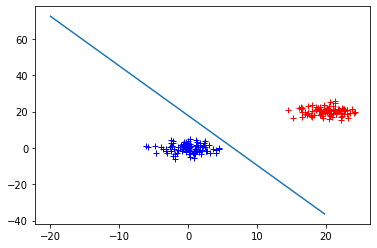

In [15]:
Xaxis = np.arange(-20., 20., 0.2)
line = []
for i in Xaxis:
    line.append(-theta[1]*i/theta[2] - theta[0]/theta[2])
plt.plot(Xaxis, line)

x = [red[i][1] for i in range(len(red))]
y = [red[i][2] for i in range(len(red))]
plt.plot(x, y, 'r+')

x2 = [blue[i][1] for i in range(len(blue))]
y2 = [blue[i][2] for i in range(len(blue))]
plt.plot(x2, y2, 'b+')
plt.show()

Nice! Our two groups have been clearly separated by the line and the line is fairly far from both groups. 

**NOTE**: *This process was repeated a few times to get a good fit for the line. I didn't want to spend a lot of time fiddling with hyperparameters and working with large numbers of samples which may have been required given this data's truly random nature.*

Let's check what the hypothesis is at x=10 - between the two means:

In [16]:
h(theta,[1,10,10])

0.9998287359499409

As expected, this is fairly close to 0.5. In reality, per the random variable definitions, the point (x,y)=(10,10) is equally likely to be a member of either class. 

We can test this model more thoroughly by running some already-classified test data through. This **must be different to the training data** or else the results obtained will not reflect its predictive ability

In [17]:
total = 0
TESTS = 100000
for i in range(TESTS):
    redx = np.random.normal(20,2)
    redy = np.random.normal(20,2)
    bluex = np.random.normal(0,2)
    bluey = np.random.normal(0,2)
    r = [1,redx,redy]
    b = [1,bluex,bluey]
    
    if h(theta,r)>=0.5:
        total+=1
    if h(theta,b)<0.5:
        total+=1
        
print(total/(TESTS*2))
    

0.99942


So, our model predicts the classes of sampled points with 99.9% accuracy. This makes sense because the standard deviation of our distributions are fairly low so overlap between the Gaussian distributions should be minimal

NOTE: The modelling of this completely random data isn't very sound probabilistically - we aren't modelling Gaussian error but instead a variable that has Gaussian distribution. However, the effect of these is very similar.

### Wine Classification

With all our tools set up, let's repeat this for the wine data:

In [18]:
whiteInfo = np.array(whiteWines)
redInfo = np.array(redWines)

# Adds a column of 1s to the data - needed for constant parameter
whiteInfo = np.insert(whiteInfo,0,1,axis=1)
redInfo = np.insert(redInfo,0,1,axis=1)

whiteWines.columns # Available data

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Now let's train our model (optimise parameters):

In [19]:
theta = np.ones(len(redInfo[0]))
rate = 0.01
print(theta)
STEPS = 10000
for i in range(STEPS):
    for j in range(1000):      
        # Processes a white wine - Class 1
        theta = step(theta,rate,whiteInfo[j],1)
        # Processes a red wine - Class 0
        theta = step(theta,rate,redInfo[j],0)
print(theta)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 144.3804847   -26.96398501 -385.25260103   38.06873149   10.47426644
  -89.43356776   -1.97519062    2.43600757  134.20025537  -46.48858353
 -293.14478752   20.1141584 ]


Compared to the previous example, we can't plot the classification boundary for this dataset because it is represented by a hyperplane in n-dimensional space where n is the number of characteristics

And now for testing:

In [20]:
def test(theta,start_i,end_i):
    total = 0
    for i in range(start_i,end_i):
    # Process white wines
        if (h(theta,whiteInfo[i])>=0.5):
            total+=1
    # Process red wines
        if (h(theta,redInfo[i])<0.5):
            total+=1
    print(total/(2*(end_i-start_i)))

We used the first 1000 entries for training so let's test on the other datapoints:

In [21]:
test(theta,1000,1599)

0.9682804674457429


Not Bad. Some simple iteration and a little bit of calculus allow us to relate a linear combination of characteristics with a datapoint's correct class. And 96.8% correct is fairly good; certainly better than an uninformed human could do from such a large set of data.

If we test on our training data, we get a higher (**inaccurate**) result because the training specifically optimised over this data:

In [22]:
test(theta,0,1000)

0.975


### Closing Thoughts

Just like linear regression, logistic regression is a very useful technique which arises from **fairly simple principles**. By the **power of classification**, data patterns can be modelled and valuable predictions made. And, as with linear regression, these standard techniques shouldn't be immediately discarded for more advanced (and more complicated) ones.
______________
Stay tuned to my ***Github*** - [HydraulicSheep](https://github.com/HydraulicSheep) - for explorations of more great ***Game Theory*** and ***Statistics*** content.